In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df=pd.read_csv("Employee data.csv")
print(df.info())
print("\nthe first 5 rows:")
print(df.head())
print("\nnull values are :")
print(df.isnull().sum())





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB
None

the first 5 rows:
            Name            Team  Number Position  Age  Height  Weight  \
0  Avery Bradley  Boston Celtics       0       PG   25  06-Feb     180   
1    Jae Crowder  Boston Celtics      99       SF   25  06-Jun     235   
2   John Holland  Boston Celtics      30       SG   27  06-May     205   
3    R.J. Hunter  Boston Celtics      28       SG   22  06-May     185   
4  Jonas J

In [48]:
df.head(5)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [49]:
df.describe()

,Number,Age,Weight,Salary
count,458.000000,458.000000,458.000000,4.470000e+02
mean,17.713974,26.934498,221.543668,4.833970e+06
std,15.966837,4.400128,26.343200,5.226620e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.025210e+06
50%,13.000000,26.000000,220.000000,2.836186e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [69]:
# Preprocessing

df["Height"]=np.random.randint(150,181,size=len(df))
print(df["Height"].head())
df.head(5)

#Determine the distribution of employee to each team

team=df["Team"].value_counts()
print(team)

total_employees =team.sum()
percentage=(team/total_employees)*100
print(percentage)

0    179
1    155
2    173
3    161
4    159
Name: Height, dtype: int32
Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64
Team
New Orleans Pelicans  

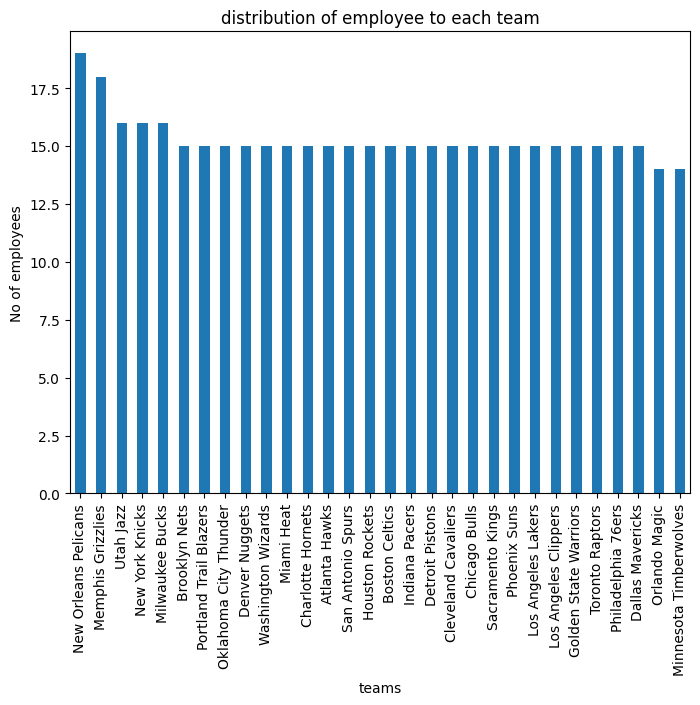

In [70]:
#Graphical representation

team.plot(kind="bar",figsize=(8,6))
plt.xlabel("teams")
plt.ylabel("No of employees")
plt.title("distribution of employee to each team")
plt.show()


From the analayis the distribution of employee to each team. The New Orleans Pelicans has the most and least teams are orlando magic and minnesota timberwolves


In [67]:
#Segregate employees

position=df["Position"].value_counts()
print(position)

Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64


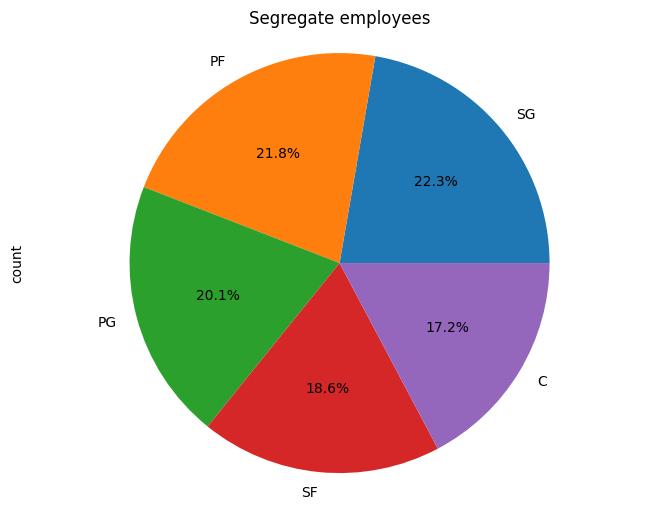

In [66]:
#Graphical representation

position.plot(kind="pie",figsize=(8,6),autopct="%1.1f%%")
plt.axis("equal")
plt.title("Segregate employees")
plt.show()


By using pie chart we done the analysis to Segregate employees based on their position , here we can see the position SG have more employees

In [55]:
#Predominant age group among employees
age_bin=[20,30,40,50]
age_labels=["20-30","30-40","40-50"]
df["agedata"]=pd.cut(df["Age"],bins=age_bin,labels=age_labels)
agegroup=df["agedata"].value_counts()
print(agegroup)


agedata
20-30    346
30-40     91
40-50      0
Name: count, dtype: int64


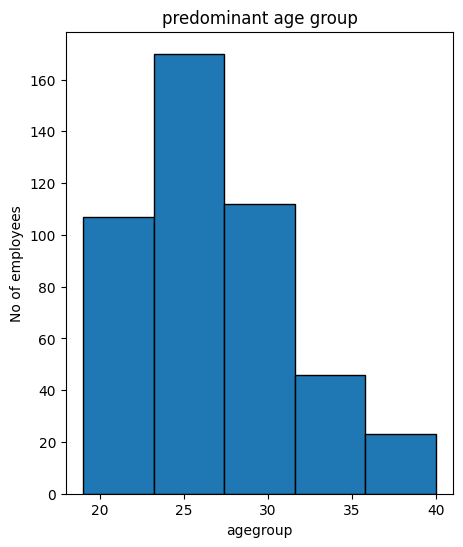

In [56]:
#Graphical representation

plt.figure(figsize=(5,6))
plt.hist(df["Age"],bins=5,edgecolor="black")
plt.xlabel("agegroup")
plt.ylabel("No of employees")
plt.title("predominant age group")
plt.show()

we find the  predominant age group among employees and provide the output by using histogram, from the analysis we can see that the age group between 20-30 have more employees

In [57]:
#Which team and position have the highest salary expenditure
salary_team=df.groupby("Team")["Salary"].sum()
highest_salaryteam=salary_team.idxmax()
print(highest_salaryteam)

#Position_team
position_team=df.groupby("Position")["Salary"].sum()
highestsalary_position=position_team.idxmax()
print(highestsalary_position)


Cleveland Cavaliers
C


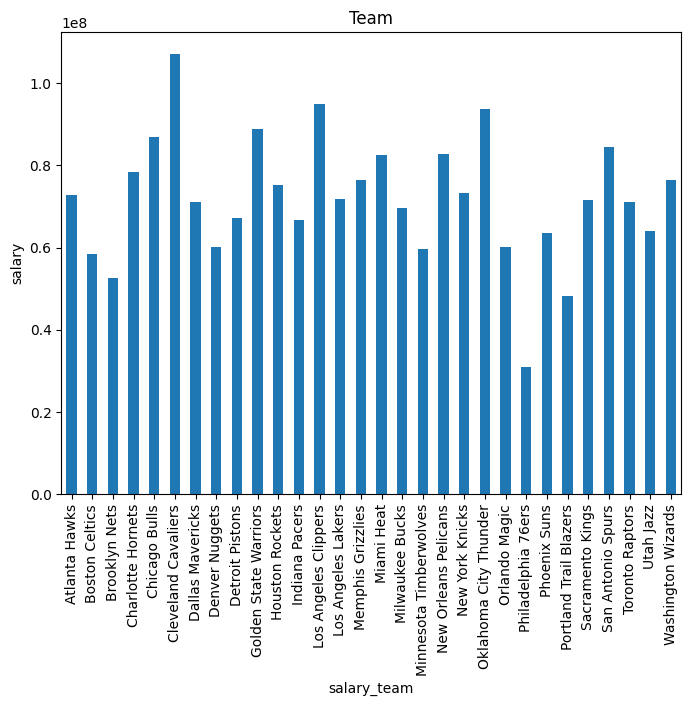

In [75]:
#1graph

salary_team.plot(kind="bar",figsize=(8,6))
plt.xlabel("salary_team")
plt.ylabel("salary")
plt.title("Team")
plt.show()


This bar chart shows which team  have the highest salary expenditure  from the analysis Cleveland Cavaliers are the team  have more salary 

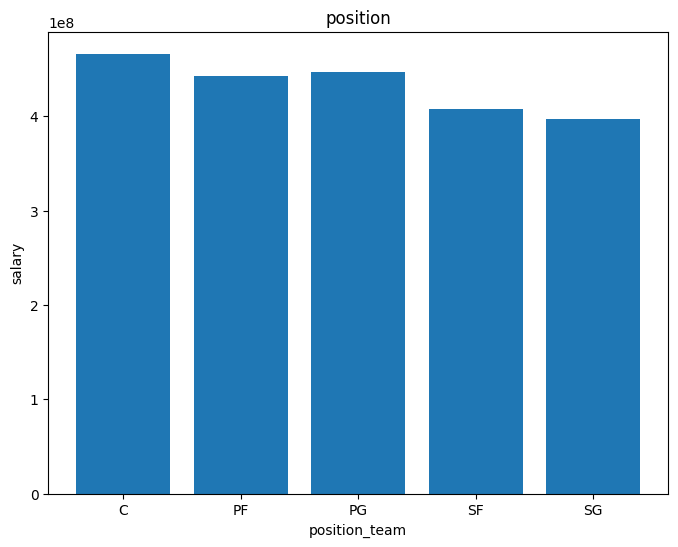

In [59]:
#2graph
plt.figure(figsize=(8,6))
plt.bar(position_team.index,position_team)
plt.xlabel("position_team")
plt.ylabel("salary")
plt.title("position")
plt.show()

From the bar chart the analysis shows that the position c have the highest salary expenditure

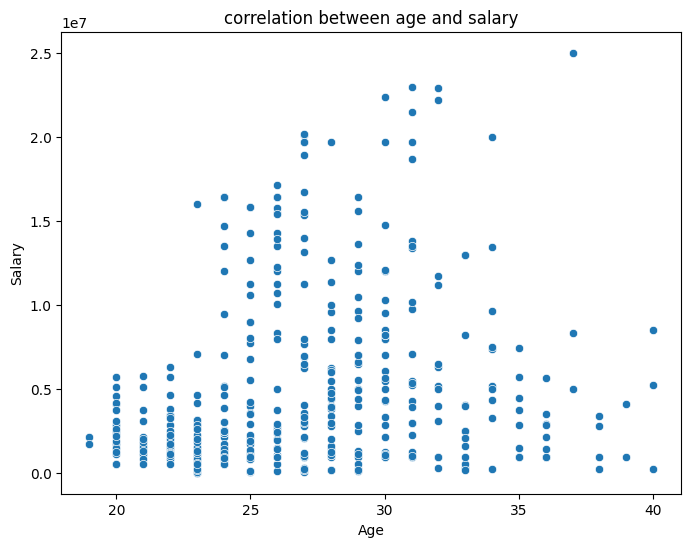

In [60]:
#Any correlation between age and salary
plt.figure(figsize=(8,6))
sns.scatterplot(x="Age",y="Salary",data=df)
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("correlation between age and salary")
plt.show()

Scatter plot chart shows the analysis-as the age increases salary increases

In [61]:
df.duplicated().sum()

0

In [62]:
df.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
agedata     21
dtype: int64

In [63]:
df['Salary'].fillna(df['Salary'].mean())

0      7.730337e+06
1      6.796117e+06
2      4.833970e+06
3      1.148640e+06
4      5.000000e+06
           ...     
453    2.433333e+06
454    9.000000e+05
455    2.900000e+06
456    9.472760e+05
457    9.472760e+05
Name: Salary, Length: 458, dtype: float64

In [64]:
df.shape

(458, 10)